In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2024-01-18 12:53:02.001380: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-18 12:53:02.026434: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-18 12:53:02.026453: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-18 12:53:02.027262: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-18 12:53:02.032377: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-18 12:53:02.032740: I tensorflow/core/platform/cpu_feature_guard.cc:1

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 5

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

2024-01-18 12:53:03.428932: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-18 12:53:03.429590: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1125 (4.39 KB)
Trainable params: 1125 (4.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.6499 - accuracy: 0.2188
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 35ms/step - loss: 1.6496 - accuracy: 0.2311 - val_loss: 1.6559 - val_accuracy: 0.1523
Epoch 2/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.6047 - accuracy: 0.2500
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 7ms/step - loss: 1.6265 - accuracy: 0.2356 - val_loss: 1.6362 - val_accuracy: 0.2053
Epoch 3/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.6396 - accuracy: 0.2891
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 9ms/step - loss: 1.6305 - accuracy: 0.2222 - val_loss: 1.6203 - val_accuracy: 0.2119
Epoch 4/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.6321 - accuracy: 0.2031
Epoch 4: savin

/home/dominik/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 8ms/step - loss: 1.5637 - accuracy: 0.2867 - val_loss: 1.5614 - val_accuracy: 0.1722
Epoch 10/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.5687 - accuracy: 0.2578
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 7ms/step - loss: 1.5663 - accuracy: 0.2867 - val_loss: 1.5548 - val_accuracy: 0.1788
Epoch 11/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.5456 - accuracy: 0.2969
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 7ms/step - loss: 1.5487 - accuracy: 0.2978 - val_loss: 1.5490 - val_accuracy: 0.1987
Epoch 12/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.5416 - accuracy: 0.3125
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [=====================

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.7616


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 38ms/step
[0.6729812  0.31016305 0.0043292  0.00241386 0.01011271]
0


# 混同行列

5/5 [==============================] - 0s 553us/step


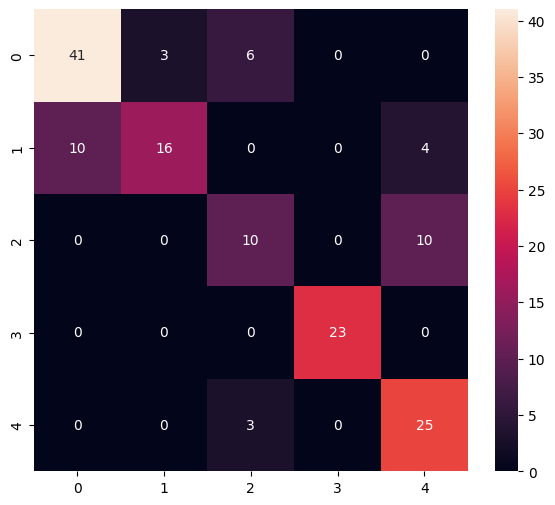

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        50
           1       0.84      0.53      0.65        30
           2       0.53      0.50      0.51        20
           3       1.00      1.00      1.00        23
           4       0.64      0.89      0.75        28

    accuracy                           0.76       151
   macro avg       0.76      0.75      0.74       151
weighted avg       0.77      0.76      0.76       151



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

/home/dominik/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpu0a6l1dt/assets


INFO:tensorflow:Assets written to: /tmp/tmpu0a6l1dt/assets
2024-01-18 12:53:11.835482: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-01-18 12:53:11.835498: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-01-18 12:53:11.835685: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpu0a6l1dt
2024-01-18 12:53:11.836414: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-01-18 12:53:11.836422: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpu0a6l1dt
2024-01-18 12:53:11.838238: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-01-18 12:53:11.838726: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-01-18 12:53:11.859138: I tensorflow/cc/saved_model/loader.cc:217] Running initializatio

6588

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 142 µs, sys: 32 µs, total: 174 µs
Wall time: 122 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.6729812  0.31016305 0.0043292  0.00241386 0.01011271]
0
